<a href="https://colab.research.google.com/github/kang-narae/AI-DL-DA/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98_%EC%86%90%EA%B8%80%EC%94%A8_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import datasets
from keras.utils import np_utils

In [ ]:
(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)   #학습용 6만개
print(X_test.shape, Y_test.shape)   #검증용 만개로 애초에 잘려있음

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


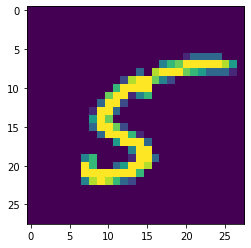

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  29  86  86  86  86   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 114
  170 198 255 255 255 255 255 226 141   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  86 

In [ ]:
my_sample = np.random.randint(60000)
plt.imshow(X_train[my_sample])   #원래모노칼라임. 단색만 가짐. 0~255까지 검정 흰색 사이의 범위.  camp='gray'넣으면 원본.
plt.show()
print(Y_train[my_sample])
print(X_train[my_sample])

In [ ]:
y_train = np_utils.to_categorical(Y_train)  #이러면 원핫인코딩 됨.
y_test= np_utils.to_categorical(Y_test)
print(Y_train[5000])
print(y_train[5000])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
x_train = X_train.reshape(-1, 28*28)
x_test = X_test.reshape(-1 , 28*28)
x_train = x_train/255    #민맥스 스케일링. 
x_test = x_test/ 255
print(x_train.shape)

(60000, 784)


In [ ]:
model= Sequential()
model.add(Dense(128, input_dim= 28*28, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
fit_hist = model.fit(x_train, y_train, batch_size= 128, epochs=15, validation_split=0.2, verbose=1)

Epoch 1/15
375/375 [==============================] - 3s 6ms/step - loss: 0.3488 - accuracy: 0.9015 - val_loss: 0.1710 - val_accuracy: 0.9483
Epoch 2/15
375/375 [==============================] - 2s 5ms/step - loss: 0.1440 - accuracy: 0.9582 - val_loss: 0.1223 - val_accuracy: 0.9638
Epoch 3/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0987 - accuracy: 0.9706 - val_loss: 0.1076 - val_accuracy: 0.9682
Epoch 4/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0746 - accuracy: 0.9774 - val_loss: 0.0947 - val_accuracy: 0.9712
Epoch 5/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0557 - accuracy: 0.9834 - val_loss: 0.0828 - val_accuracy: 0.9755
Epoch 6/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0457 - accuracy: 0.9862 - val_loss: 0.0887 - val_accuracy: 0.9736
Epoch 7/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0345 - accuracy: 0.9897 - val_loss: 0.0846 - val_accuracy: 0.9757
Epoch 

In [ ]:
# 검증해보자

score= model.evaluate(x_test, y_test, verbose=0)
print('Final test set accuracy:', score[1])

Final test set accuracy: 0.9763000011444092


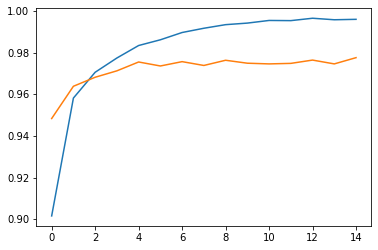

In [ ]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()

7
[[4.6366674e-10 4.1498714e-11 1.3138184e-07 2.7947599e-05 1.0613732e-18
  9.9626823e-14 2.3146008e-20 9.9997199e-01 1.9620176e-12 4.0823071e-08]]
7


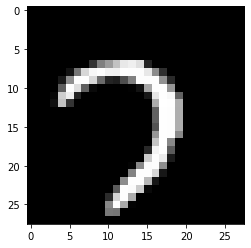

In [ ]:
my_sample=np.random.randint(10000)
plt.imshow(X_test[my_sample], cmap='gray')  #입력값
print(Y_test[my_sample])    #정답
pred= model.predict(x_test[my_sample].reshape(-1, 28*28)) #입력값으로 에측한 값
print(pred)
print(np.argmax(pred))